In [1]:
import pandas as pd 
import plotly.express as px 

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_44915/3448599193.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [192]:
descriptors = pd.read_csv('classical_descriptor.csv')

# Split the 'DGRP' column and create the new 'DGRP' and 'Sex' columns
descriptors[['DGRP', 'Sex']] = descriptors['DGRP'].str.split('_', expand=True)

# Update the 'DGRP' column
descriptors['DGRP'] = 'DGRP_' + descriptors['DGRP']

# Update the 'Sex' column
descriptors['Sex'] = descriptors['Sex'].apply(lambda x: 'M' if x == 'male' else 'F')

descriptors['DGRP'] = descriptors['DGRP'].apply(lambda x: 'DGRP_0' + x.split('DGRP_')[1] if len(x.split('DGRP_')[1]) == 2 else 'DGRP_' + x.split('DGRP_')[1])

In [193]:
descriptors

,DGRP,Length,Width,Height,HeightMax,AreaSq,AreaCube,Volume,HullArea,HullVolume,AreaRatio,VolumeRatio,Sex
0,DGRP_796,134.0,187.0,86.0,90.0,4112647,632441,587521,50006.292898,803788.666667,82.242589,0.730940,F
1,DGRP_195,131.0,184.0,84.0,85.0,3555888,550527,507984,46253.829949,732390.666667,76.877699,0.693597,M
2,DGRP_354,160.0,133.0,110.0,140.0,3856895,602950,550985,48980.075637,834460.500000,78.744162,0.660289,M
3,DGRP_306,162.0,171.0,104.0,118.0,4058334,628813,579762,50775.951144,830688.333333,79.926302,0.697930,M
4,DGRP_705,144.0,159.0,67.0,85.0,3659397,563804,522771,43778.427251,695223.166667,83.589047,0.751947,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,DGRP_859,128.0,148.0,136.0,161.0,4377688,673696,625384,52016.212581,886308.833333,84.160068,0.705605,M
107,DGRP_332,105.0,115.0,110.0,148.0,2965179,468436,423597,37495.569130,548559.833333,79.080784,0.772198,F
108,DGRP_486,144.0,90.0,132.0,165.0,3049585,485315,435655,44058.090766,611719.333333,69.217366,0.712181,M
109,DGRP_026,144.0,96.0,166.0,166.0,4109847,633355,587121,47858.527163,796134.833333,85.874916,0.737464,M


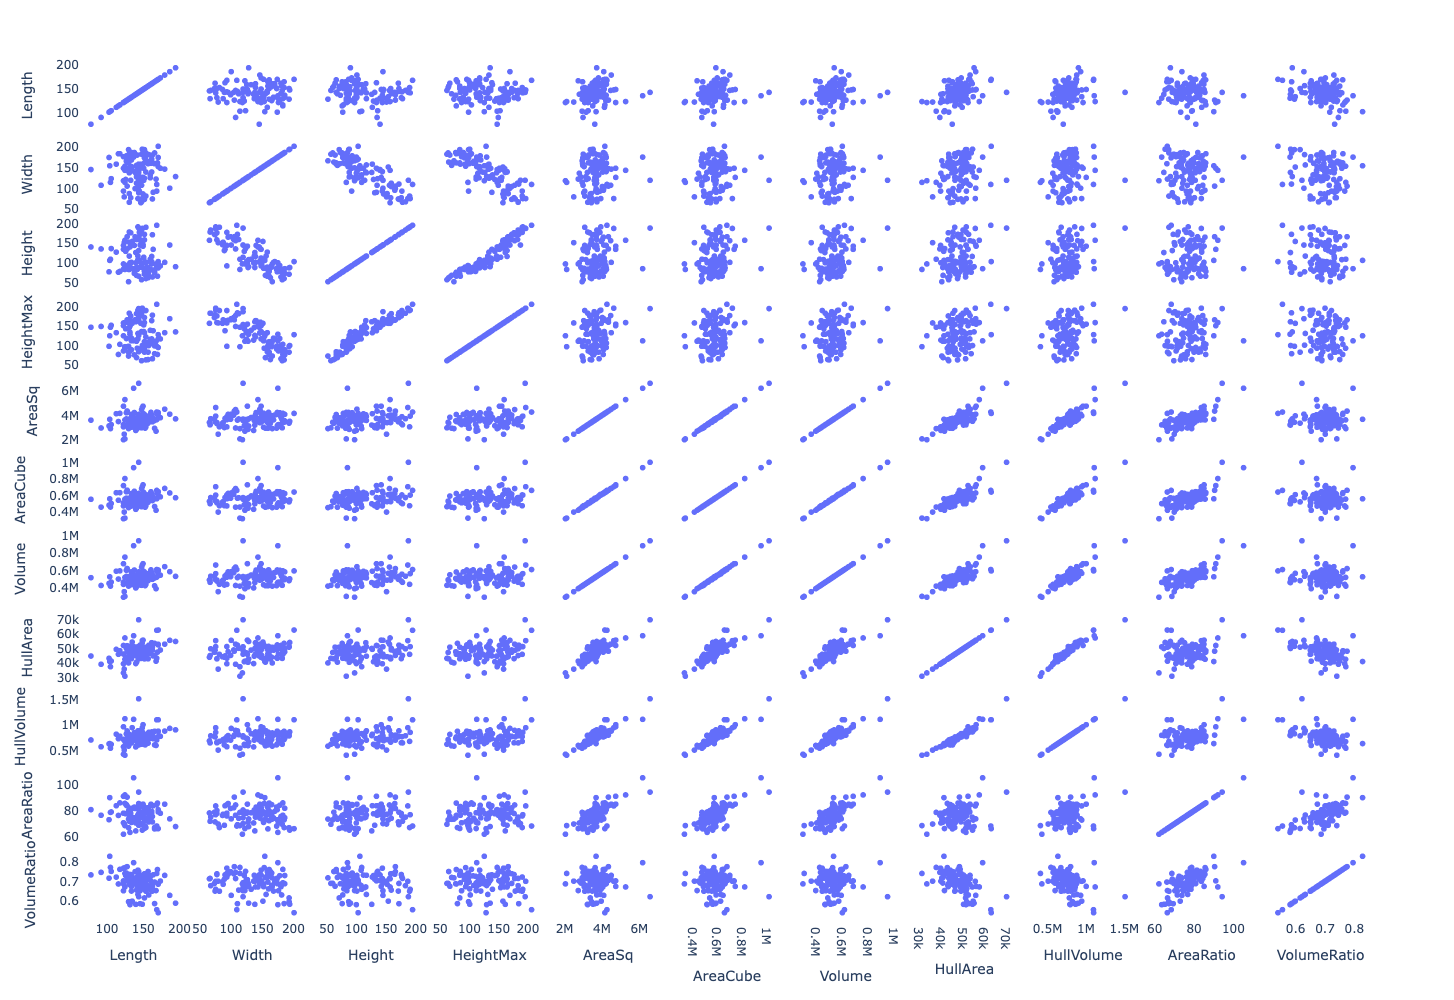

In [199]:
# Exclude the 'DGRP' and 'Sex' columns
descriptors_modified = descriptors.drop(['DGRP','Sex'], axis=1)

# Create the scatter matrix plot with trendlines
fig = px.scatter_matrix(descriptors_modified, width=1000, height=1000)

# Delete the background
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
)
fig.show()
#fig.write_html('results/classical_descriptors_sex_comp.html')

In [195]:
from scipy.stats import pearsonr

In [200]:
def calculate_pvalues(df):
    """
    This function calculates the p-values for the correlation matrix of a dataframe.
    
    Parameters:
    df (DataFrame): The input dataframe.
    
    Returns:
    pvalues (DataFrame): The dataframe containing the p-values for the correlation matrix.
    """
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [201]:

p_values = calculate_pvalues(descriptors_modified)
correlation_descriptors = descriptors_modified.corr()

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_44915/299275884.py:16: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [202]:
columns_of_interest = descriptors_modified.columns.tolist()

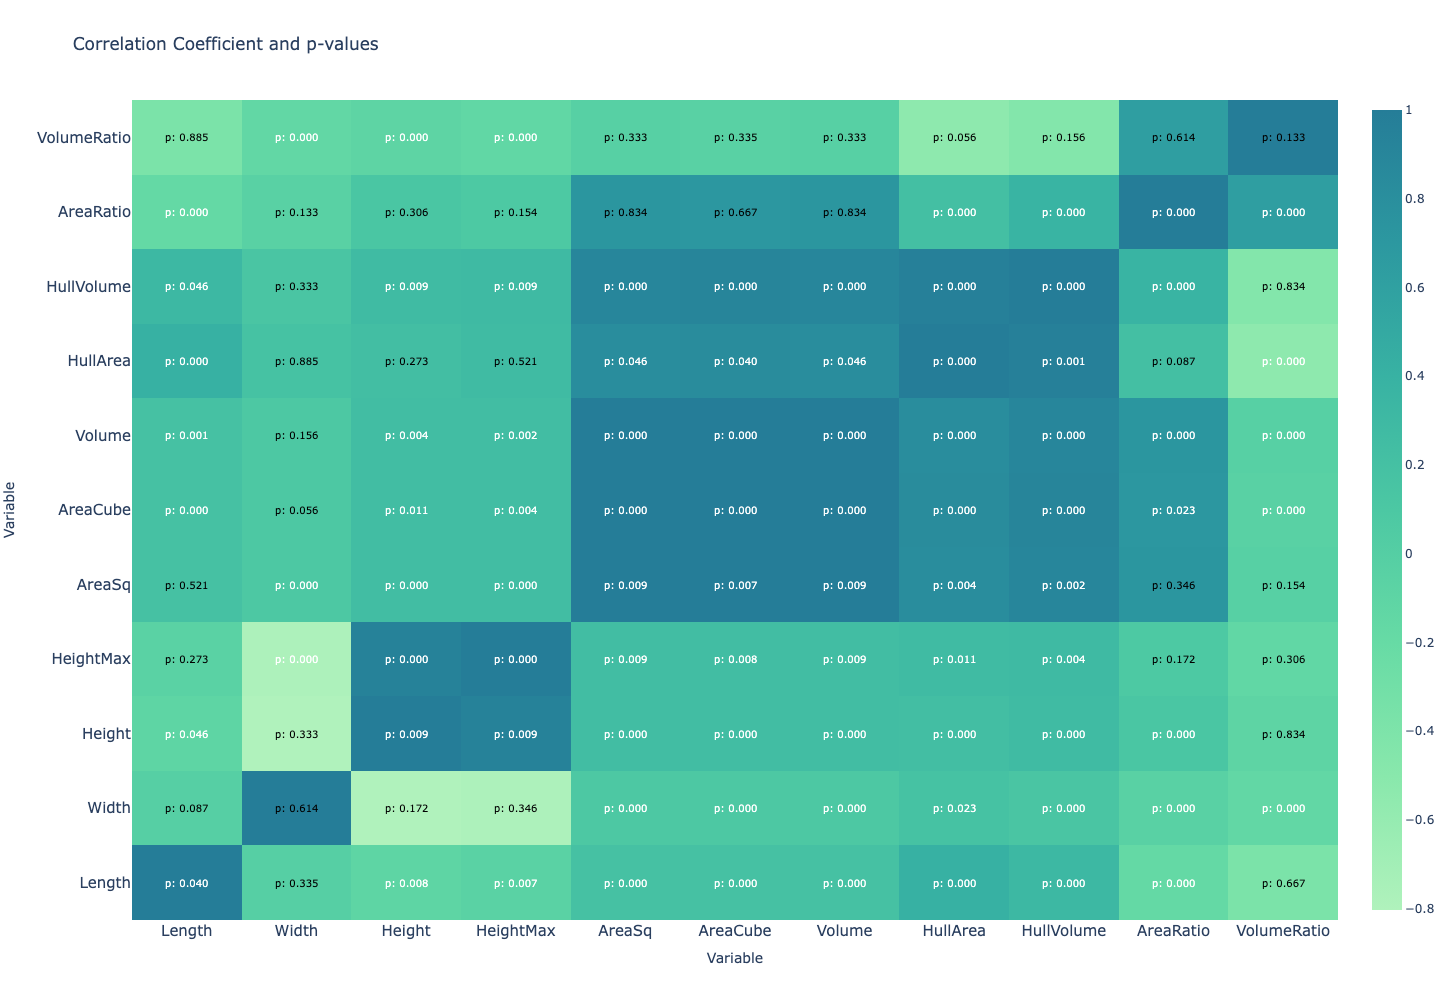

In [203]:
import plotly.graph_objects as go
import scipy.stats as stats


# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                    z=correlation_descriptors,
                     x=correlation_descriptors.columns,
                     y=correlation_descriptors.columns,
                     colorscale='tealgrn',
                     showscale=True))

names = descriptors_modified.columns.tolist()
annotations = []
for i, row in enumerate(correlation_descriptors.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=names[j],
                y=names[i],
                text=f"p: {p_values.iloc[i, j]:.3f}",
                showarrow=False,
                font=dict(size=10, color="black" if abs(p_values.iloc[i, j]) > 0.05 else "white")
            )
        )



# Change the size of the heatmap
fig.update_layout(
    title="Correlation Coefficient and p-values",
    annotations=annotations,
    xaxis=dict(title="Variable", tickfont=dict(size=15)),
    yaxis=dict(title="Variable", tickfont=dict(size=15)),
    autosize=False,
    width=1000,
    height=1000
)

fig.show()
#fig.write_html('results/classical_descriptors_correlation_pearson.html')

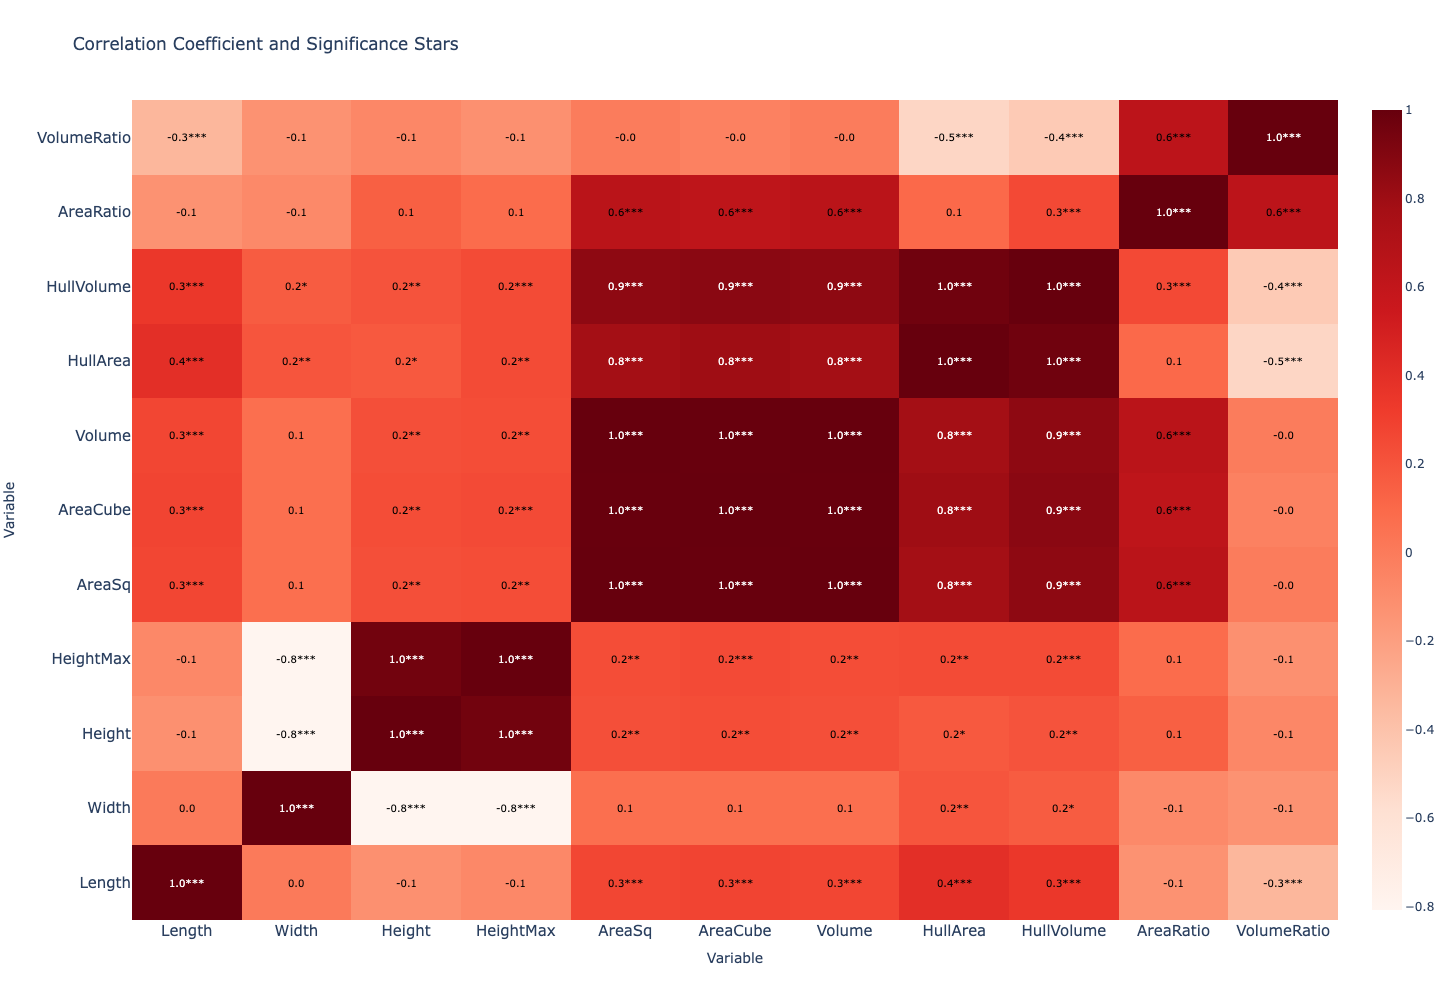

In [205]:
from scipy.stats import spearmanr
correlation_matrix, p_values = spearmanr(descriptors_modified, nan_policy='omit')

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=columns_of_interest,
                    y=columns_of_interest,
                    colorscale='reds',
                    showscale=True))

names = columns_of_interest
annotations = []
for i, row in enumerate(correlation_matrix):
    for j, value in enumerate(row):
        # Determine significance stars
        stars = ''
        p_val = p_values[i, j]
        if p_val < 0.01:
            stars = '***'
        elif p_val < 0.05:
            stars = '**'
        elif p_val < 0.1:
            stars = '*'

        annotations.append(
            dict(
                x=names[j],
                y=names[i],
                text=f"{value:.1f}{stars}",
                showarrow=False,
                font=dict(size=10, color="white" if value > 0.65 else "black")
            )
        )

# Change the size of the heatmap
fig.update_layout(
    title="Correlation Coefficient and Significance Stars",
    annotations=annotations,
    xaxis=dict(title="Variable", tickfont=dict(size=15)),
    yaxis=dict(title="Variable", tickfont=dict(size=15)),
    autosize=False,
    width=1000,
    height=1000
)
fig.write_html("results/classical_descriptors_correlation_pearson.html")
fig.show()

# Correlating the morphological descriptors with behaviour 

## Correlation with the 55 behaviours 

In [5]:
# umap_male.csv and umap_female.csv contain the dimensionaly reduced 55 behaviours of the DGRP lines we scanned 
# we just need to perform a umap on the classical descriptors and and correlate it with the umap of the behaviour 
import umap

# Separate the DataFrame into male and female
desc_male = descriptors[descriptors['Sex'] == 'M'].drop(['DGRP', 'Sex'], axis=1)
desc_female = descriptors[descriptors['Sex'] == 'F'].drop(['DGRP', 'Sex'], axis=1)


In [6]:
desc_male

,Length,Width,Height,HeightMax,AreaSq,AreaCube,Volume,HullArea,HullVolume,AreaRatio,VolumeRatio
1,131.0,184.0,84.0,85.0,3555888,550527,507984,46253.829949,7.323907e+05,76.877699,0.693597
2,160.0,133.0,110.0,140.0,3856895,602950,550985,48980.075637,8.344605e+05,78.744162,0.660289
3,162.0,171.0,104.0,118.0,4058334,628813,579762,50775.951144,8.306883e+05,79.926302,0.697930
5,150.0,87.0,147.0,158.0,3400404,528520,485772,44307.844596,6.951780e+05,76.744965,0.698774
7,171.0,153.0,88.0,118.0,4206930,647968,600990,52965.128560,8.755385e+05,79.428298,0.686423
9,124.0,80.0,152.0,159.0,2516206,407380,359458,35850.085355,5.120150e+05,70.186890,0.702046
10,152.0,174.0,84.0,92.0,4100460,629893,585780,49294.546581,8.233257e+05,83.182832,0.711480
11,164.0,91.0,135.0,139.0,3779111,583740,539873,44914.660489,7.353488e+05,84.139810,0.734173
13,131.0,67.0,179.0,184.0,3267215,508886,466745,45209.279248,6.519883e+05,72.268681,0.715879
16,78.0,146.0,141.0,148.0,3645313,562383,520759,44882.873836,7.095463e+05,81.218351,0.733932


In [7]:
# Apply z-score normalization to behav_male and behav_female
desc_male = (desc_male - desc_male.mean()) / desc_male.std()
desc_female = (desc_female - desc_female.mean()) / desc_female.std()

In [35]:
desc = descriptors.drop(['DGRP', 'Sex'], axis=1)
desc = (desc - desc.mean()) / desc.std()

In [36]:
reducer = umap.UMAP()
umap_all_sex= reducer.fit_transform(desc)

In [82]:
desc_all = descriptors
umap_all = pd.DataFrame(data=umap_all_sex)
umap_all.columns = ['UMAP1', 'UMAP2'] 
umap_all["DGRP"] = desc_all["DGRP"].values
umap_all["Sex"] = desc_all["Sex"].values

In [83]:
umap_all

,UMAP1,UMAP2,DGRP,Sex
0,1.386185,6.333414,DGRP_796,F
1,0.228046,4.960980,DGRP_195,M
2,2.950148,6.130188,DGRP_354,M
3,2.104365,6.570128,DGRP_306,M
4,0.914339,5.196003,DGRP_705,F
...,...,...,...,...
106,4.301918,5.689171,DGRP_859,M
107,2.604905,2.446150,DGRP_332,F
108,3.396064,2.849309,DGRP_486,M
109,4.608594,4.773101,DGRP_026,M


In [39]:
# save the umap_all

umap_all.to_csv('umap_descriptors_all_sex.csv', index=False)

/Users/skumar/opt/anaconda3/envs/brain_analysis/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



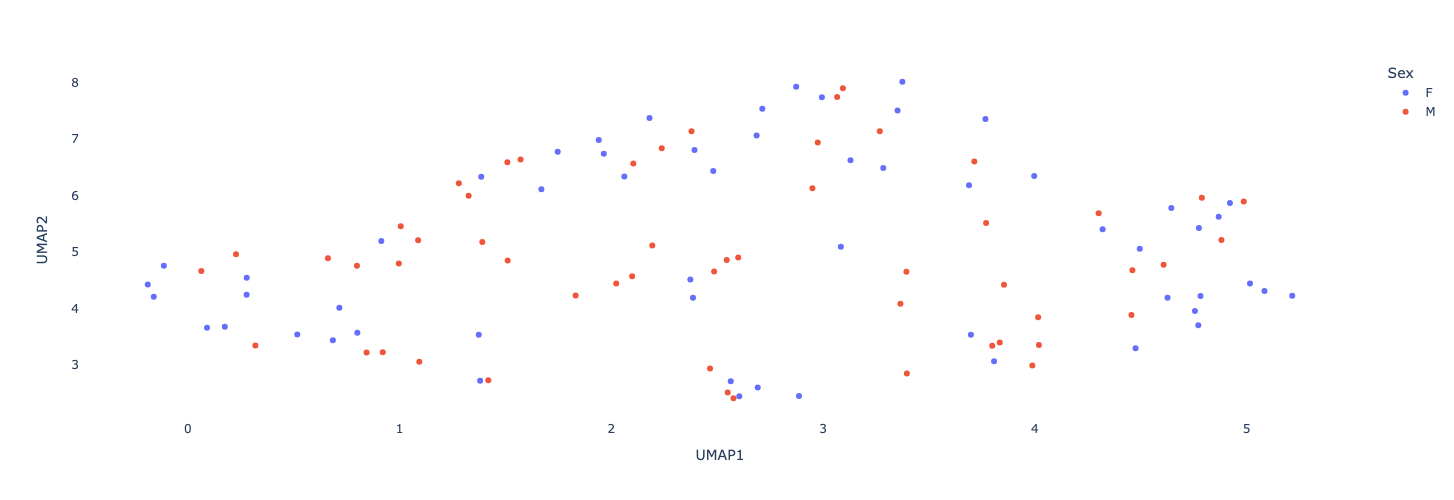

In [40]:
# Create a scatter plot with an OLS trendline
fig = px.scatter(umap_all, x='UMAP1', y='UMAP2',  color="Sex")
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=500
)
fig.show()

In [84]:
# correlate UMAP distance with DGRP lines
umap_all['distance_morpho'] = np.hypot(umap_all['UMAP1'], umap_all['UMAP2'])


In [88]:
umap_all = umap_all.sort_values(by=['DGRP'])

In [91]:
umap_all

,UMAP1,UMAP2,DGRP,Sex,distance_morpho
101,1.510911,4.849645,DGRP_021,M,5.079558
99,0.278554,4.543553,DGRP_021,F,4.552083
109,4.608594,4.773101,DGRP_026,M,6.634880
98,1.670158,6.110994,DGRP_026,F,6.335114
48,1.280270,6.220096,DGRP_031,M,6.350487
...,...,...,...,...,...
106,4.301918,5.689171,DGRP_859,M,7.132543
82,3.689640,6.184947,DGRP_859,F,7.201876
60,1.831820,4.231835,DGRP_879,M,4.611290
105,2.098875,4.572772,DGRP_900,M,5.031453


In [102]:
df = umap_all
# Pivot the DataFrame to create a new DataFrame with three columns
pivoted_df = df.pivot(index='DGRP', columns='Sex', values='distance_morpho').reset_index()
pivoted_df.columns.name = None  # Remove the 'Sex' column header

# Rename columns for clarity
pivoted_df.columns = ['DGRP', 'distance_morpho_male', 'distance_morpho_female']

# Display the new DataFrame
print(pivoted_df)


        DGRP  distance_morpho_male  distance_morpho_female
0   DGRP_021              4.552083                5.079558
1   DGRP_026              6.335114                6.634880
2   DGRP_031                   NaN                6.350487
3   DGRP_032              8.222986                6.824670
4   DGRP_048              7.273378                3.244996
..       ...                   ...                     ...
60  DGRP_850              7.659119                7.194511
61  DGRP_853              8.011093                5.122563
62  DGRP_859              7.201876                7.132543
63  DGRP_879                   NaN                4.611290
64  DGRP_900              4.888063                5.031453

[65 rows x 3 columns]


In [103]:
pivoted_df = pivoted_df.dropna()

In [109]:

fig = px.scatter(pivoted_df, x='distance_morpho_male', y='distance_morpho_female', trendline="ols",
                 title='Scatter Plot: Distance Morpho Males vs Females for Each DGRP',
                 labels={'distance_morpho_male': 'Males morphology', 'distance_morpho_female': 'Females morphology'})

fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=1000,
    height=500
)
fig.write_html("results/morphological_distance_males_vs_females.html")

In [110]:
from scipy.stats import pearsonr

# Calculate the correlation and the p-value
correlation, p_value = pearsonr(pivoted_df['distance_morpho_male'], pivoted_df['distance_morpho_female'])

print(f'The correlation between morphological descriptors and behaviour in males is {correlation}, with a p-value of {p_value}')


The correlation between morphological descriptors and behaviour in males is 0.30181885850437234, with a p-value of 0.04149888763050051


,UMAP1,UMAP2,DGRP,Sex,distance_morpho
0,1.386185,6.333414,DGRP_796,1,6.483335
1,0.228046,4.960980,DGRP_195,0,4.966219
2,2.950148,6.130188,DGRP_354,0,6.803130
3,2.104365,6.570128,DGRP_306,0,6.898909
4,0.914339,5.196003,DGRP_705,1,5.275837
...,...,...,...,...,...
106,4.301918,5.689171,DGRP_859,0,7.132543
107,2.604905,2.446150,DGRP_332,1,3.573399
108,3.396064,2.849309,DGRP_486,0,4.433036
109,4.608594,4.773101,DGRP_026,0,6.634880


/Users/skumar/opt/anaconda3/envs/brain_analysis/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



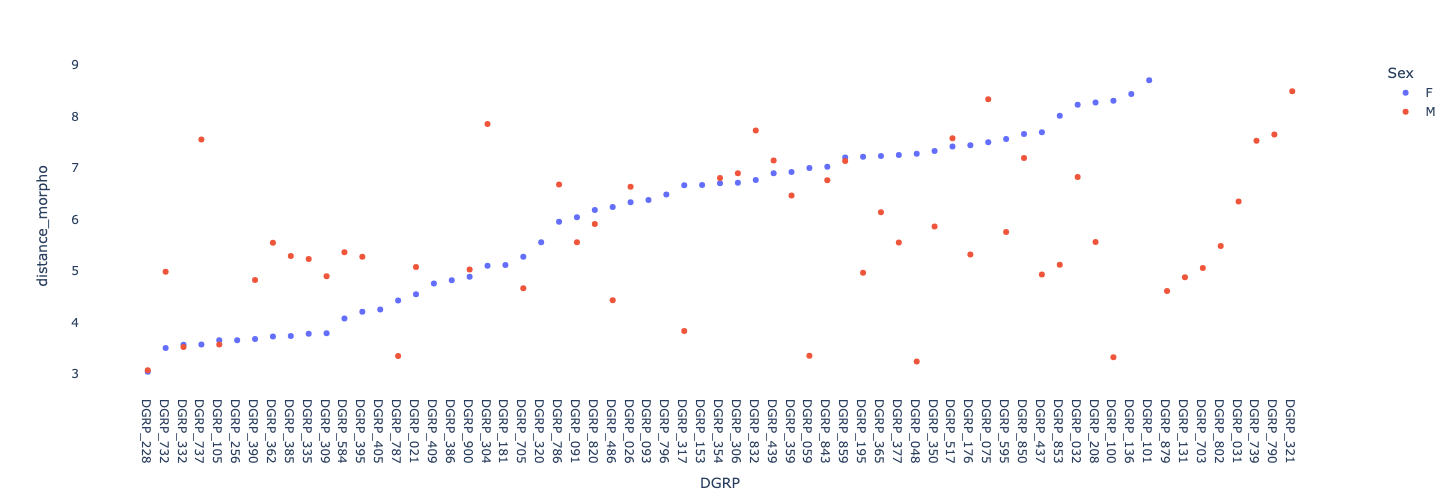

In [56]:
# Create a scatter plot with an OLS trendline
fig = px.scatter(umap_all, x='DGRP', y='distance_morpho', color='Sex')
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=500
)
fig.show()

## Male and female separate analysis

In [8]:

# UMAP on behav_male and behav_female

reducer = umap.UMAP()
umap_male = reducer.fit_transform(desc_male)
umap_female = reducer.fit_transform(desc_female)

In [9]:
desc_male = descriptors[descriptors['Sex'] == 'M']
umap_male = pd.DataFrame(data=umap_male)
umap_male.columns = ['UMAP1', 'UMAP2'] 
umap_male["DGRP"] = desc_male["DGRP"].values


In [10]:
desc_female = descriptors[descriptors['Sex'] == 'F']
umap_female = pd.DataFrame(data=umap_female)
umap_female.columns = ['UMAP1', 'UMAP2'] 
umap_female["DGRP"] = desc_female["DGRP"].values

In [42]:
# save umaps as csv
umap_male.to_csv('umap_descriptors_male.csv', index=False)
umap_female.to_csv('umap_descriptors_female.csv', index=False)


Correlate behaviour with morphology

In [11]:
umap_behaviour_male = pd.read_csv('umap_male.csv')
umap_behaviour_female = pd.read_csv('umap_female.csv')

In [12]:
umap_behaviour_male

,x,y,morphology,dgrp,entropy0,entropy1,entropy2,labels
0,3.165365,6.560966,1.926674,DGRP_026,0.330629,0.106386,-2.001494,0
1,5.047583,6.401665,1.739554,DGRP_031,-1.373607,-1.738258,-1.013641,-1
2,4.838915,5.956668,1.739553,DGRP_031,-1.373607,-1.738258,-1.013641,-1
3,3.476239,6.874532,1.819831,DGRP_032,-0.540721,-0.942531,-0.450093,0
4,4.025001,5.941417,1.869409,DGRP_059,0.009024,-0.479523,0.077622,0
5,2.585171,6.006506,1.974268,DGRP_075,1.095901,0.508855,-0.543488,-1
6,5.024898,6.793151,2.097388,DGRP_100,1.849182,1.840623,1.756791,0
7,5.136497,7.271280,2.097359,DGRP_100,1.849182,1.840623,1.756791,0
8,5.520260,7.153505,1.979628,DGRP_105,0.728581,0.634978,-0.431583,-1
9,4.844699,8.270004,1.863524,DGRP_176,-0.395108,-0.474184,0.304310,-1


In [13]:
import numpy as np

# Calculate the Euclidean distance
umap_behaviour_male['distance_behav'] = np.hypot(umap_behaviour_male['x'], umap_behaviour_male['y'])
umap_behaviour_female['distance_behav'] = np.hypot(umap_behaviour_female['x'], umap_behaviour_female['y'])

umap_male['distance_morpho'] = np.hypot(umap_male['UMAP1'], umap_male['UMAP2'])
umap_female['distance_morpho'] = np.hypot(umap_female['UMAP1'], umap_female['UMAP2'])



In [14]:
# Rename the 'dgrp' column to 'DGRP'
umap_behaviour_male = umap_behaviour_male.rename(columns={'dgrp': 'DGRP'})
umap_behaviour_female = umap_behaviour_female.rename(columns={'dgrp': 'DGRP'})

In [15]:
# Merge the DataFrames
merged_male = umap_male.merge(umap_behaviour_male, on='DGRP')
merged_female = umap_female.merge(umap_behaviour_female, on='DGRP')

In [75]:
import plotly.express as px

# Create a scatter plot with an OLS trendline
fig = px.scatter(merged_male, x='distance_behav', y='distance_morpho', trendline='ols')
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=500
)

# Show the plot
fig.write_html('results/morpho_descriptors_behaviour_scatter.html')

In [76]:
import plotly.express as px

# Create a scatter plot with an OLS trendline
fig = px.scatter(merged_female, x='distance_behav', y='distance_morpho', trendline='ols')
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=500
)

# Show the plot
fig.write_html('results/morpho_descriptors_behaviour_scatter_female.html')

In [16]:
from scipy.stats import pearsonr

# Calculate the correlation and the p-value
correlation, p_value = pearsonr(merged_male['distance_morpho'], merged_male['distance_behav'])

print(f'The correlation between morphological descriptors and behaviour in males is {correlation}, with a p-value of {p_value}')

The correlation between morphological descriptors and behaviour in males is 0.119269386841901, with a p-value of 0.39497393872833997


In [17]:

# Calculate the correlation and the p-value
correlation, p_value = pearsonr(merged_female['distance_morpho'], merged_female['distance_behav'])

print(f'The correlation between morphological descriptors and behaviour in females is {correlation}, with a p-value of {p_value}')

The correlation between morphological descriptors and behaviour in females is 0.06564412215469301, with a p-value of 0.6575587362694642


# Comparing the morphological manifold with Riddha's experimental data!

In [18]:
1+1

2

In [19]:
# merge umap male and female 
# Add a 'Sex' column to each DataFrame
umap_male['Sex'] = 'M'
umap_female['Sex'] = 'F'

# Concatenate the DataFrames
merged_df = pd.concat([umap_male, umap_female])

In [111]:
merged_df = umap_all

/Users/skumar/opt/anaconda3/envs/brain_analysis/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



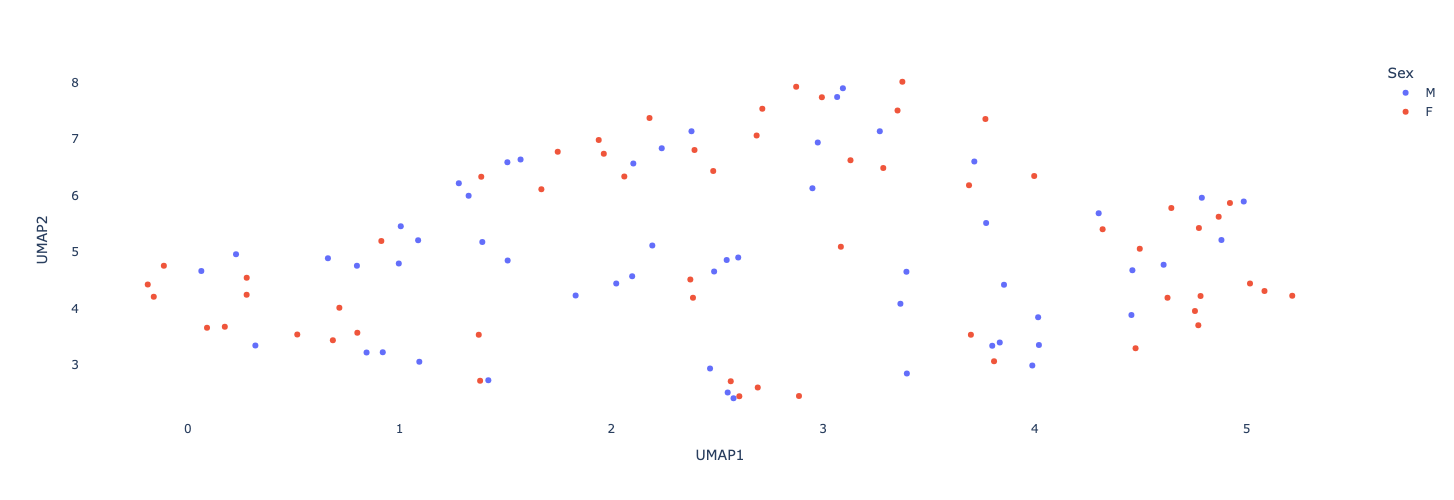

In [113]:
# Create a scatter plot with an OLS trendline
fig = px.scatter(merged_df, x='UMAP1', y='UMAP2',  color="Sex")
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=800,
    height=500
)
fig.show()
fig.write_html("results/umap_morphologica_descriptors.html")

In [114]:
# import dgrpool_kl_behaviour.csv
kl = pd.read_csv("dgrpool_kl_behaviour.tsv", sep="\t")

In [115]:
# Drop all columns except 'DGRP', 'sex', 'KL_frac', and 'KL_ls'
kl = kl[['DGRP', 'sex', 'KL_frac', 'KL_ls']]

# Rename the 'sex' column to 'Sex'
kl = kl.rename(columns={'sex': 'Sex'})

In [116]:
merged_kl_morpho = kl.merge(merged_df, on=['DGRP', 'Sex'])


In [117]:
merged_kl_morpho

,DGRP,Sex,KL_frac,KL_ls,UMAP1,UMAP2,distance_morpho
0,DGRP_100,M,1.183707,0.054721,0.844582,3.220248,3.329161
1,DGRP_100,F,2.497266,3.872513,2.994707,7.741200,8.300268
2,DGRP_208,M,3.526593,0.106368,2.194018,5.114306,5.565055
3,DGRP_208,F,1.549054,0.107619,3.767060,7.358505,8.266700
4,DGRP_091,M,1.743437,0.251722,4.016065,3.845776,5.560465
...,...,...,...,...,...,...,...
64,DGRP_354,F,0.131146,0.272806,5.016533,4.442184,6.700642
65,DGRP_850,M,0.562914,0.057046,2.238498,6.837406,7.194511
66,DGRP_850,F,0.532709,0.080802,4.921827,5.868367,7.659119
67,DGRP_853,M,2.180849,4.064556,3.834823,3.396290,5.122563


/Users/skumar/opt/anaconda3/envs/brain_analysis/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



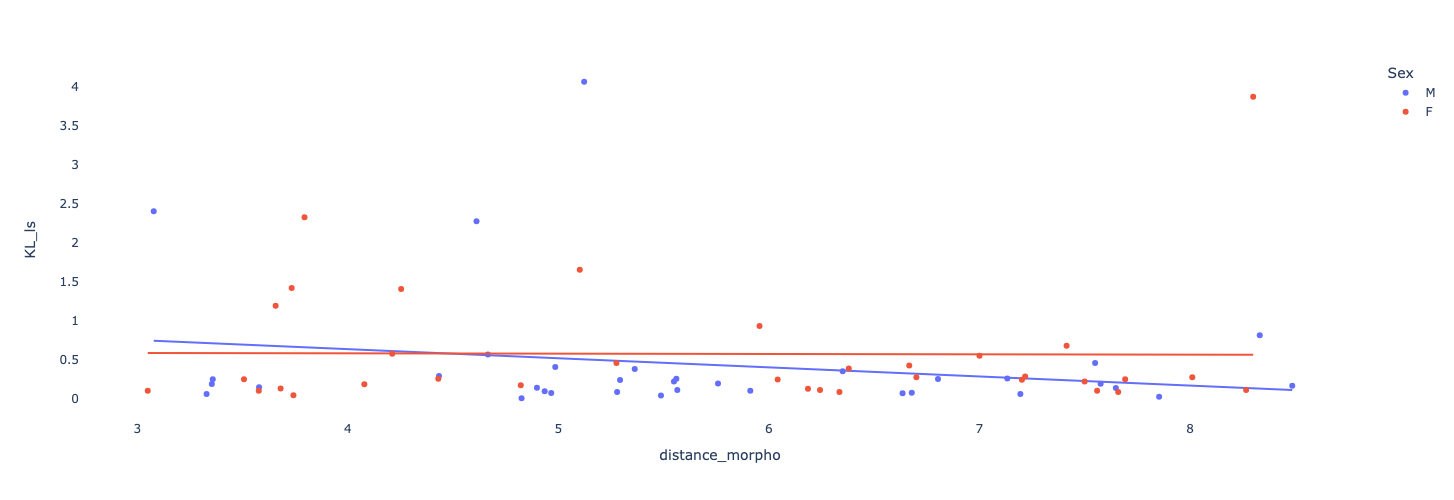

In [129]:
# Create a scatter plot with an OLS trendline
fig = px.scatter(merged_kl_morpho, x='distance_morpho', y='KL_ls', trendline='ols', color='Sex')
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
    width=1000,
    height=500
)
fig.show()
fig.write_html("results/kl_ls_vs_morpho_descriptors_sex.html")

In [126]:
# Calculate the correlation and the p-value
correlation, p_value = pearsonr(merged_kl_morpho['distance_morpho'], merged_kl_morpho['KL_ls'])

print(f'The correlation between morphological descriptors and behaviour in all sexes is {correlation}, with a p-value of {p_value}')

The correlation between morphological descriptors and behaviour in all sexes is -0.10259438093676652, with a p-value of 0.4015475127921809


In [125]:
# Calculate the correlation and the p-value
correlation, p_value = pearsonr(merged_kl_morpho[merged_kl_morpho["Sex"]=="M"]['distance_morpho'], merged_kl_morpho[merged_kl_morpho["Sex"]=="M"]['KL_ls'])

print(f'The correlation between morphological descriptors and behaviour in males is {correlation}, with a p-value of {p_value}')

The correlation between morphological descriptors and behaviour in males is -0.20824396943457726, with a p-value of 0.22996057762421995


In [127]:
# Calculate the correlation and the p-value
correlation, p_value = pearsonr(merged_kl_morpho[merged_kl_morpho["Sex"]=="F"]['distance_morpho'], merged_kl_morpho[merged_kl_morpho["Sex"]=="F"]['KL_ls'])

print(f'The correlation between morphological descriptors and behaviour in females is {correlation}, with a p-value of {p_value}')

The correlation between morphological descriptors and behaviour in females is -0.008290296732659519, with a p-value of 0.9628855075118058


# Individual descriptors and behaviour

In [ ]:
# We have to merge descriptor with kl and umap_behaviour_male and umap_behaviour_female

In [130]:
# merge umap behaviour male and female

merged_behav_umap = pd.concat([umap_behaviour_male.assign(Sex='M'), umap_behaviour_female.assign(Sex='F')], ignore_index=True)

merged_behav_umap

,x,y,morphology,DGRP,entropy0,entropy1,entropy2,labels,distance_behav,Sex
0,3.165365,6.560966,1.926674,DGRP_026,0.330629,0.106386,-2.001494,0,7.284628,M
1,5.047583,6.401665,1.739554,DGRP_031,-1.373607,-1.738258,-1.013641,-1,8.152264,M
2,4.838915,5.956668,1.739553,DGRP_031,-1.373607,-1.738258,-1.013641,-1,7.674438,M
3,3.476239,6.874532,1.819831,DGRP_032,-0.540721,-0.942531,-0.450093,0,7.703469,M
4,4.025001,5.941417,1.869409,DGRP_059,0.009024,-0.479523,0.077622,0,7.176424,M
...,...,...,...,...,...,...,...,...,...,...
96,13.206455,12.099040,1.911401,DGRP_843,0.477734,0.447103,0.688336,1,17.910813,F
97,11.871367,11.839034,1.868010,DGRP_850,-0.412346,-0.192020,0.025850,-1,16.765801,F
98,13.619273,12.132026,1.888131,DGRP_853,0.114587,0.089261,1.705516,-1,18.239261,F
99,12.768795,12.255297,1.931102,DGRP_859,0.711686,0.763456,-1.511538,1,17.698430,F


In [131]:
# merge kl with merged_behav_umap
merged_kl_umap = kl.merge(merged_behav_umap, on=['DGRP', 'Sex'])

In [132]:
merged_kl_umap

,DGRP,Sex,KL_frac,KL_ls,x,y,morphology,entropy0,entropy1,entropy2,labels,distance_behav
0,DGRP_100,M,1.183707,0.054721,5.024898,6.793151,2.097388,1.849182,1.840623,1.756791,0,8.449645
1,DGRP_100,M,1.183707,0.054721,5.136497,7.271280,2.097359,1.849182,1.840623,1.756791,0,8.902534
2,DGRP_100,F,2.497266,3.872513,11.195161,10.863478,1.935775,1.851777,0.812278,-1.131982,-1,15.599576
3,DGRP_100,F,2.497266,3.872513,11.316115,10.767718,1.935766,1.851777,0.812278,-1.131982,-1,15.620442
4,DGRP_208,M,3.526593,0.106368,3.071899,6.660889,1.832389,-0.883583,-0.743658,-0.118913,0,7.335121
...,...,...,...,...,...,...,...,...,...,...,...,...
63,DGRP_850,M,0.562914,0.057046,1.865423,6.978384,2.027186,1.033394,1.130498,1.335518,-1,7.223410
64,DGRP_850,M,0.562914,0.057046,2.097854,7.198877,2.027185,1.033394,1.130498,1.335518,-1,7.498321
65,DGRP_850,F,0.532709,0.080802,11.871367,11.839034,1.868010,-0.412346,-0.192020,0.025850,-1,16.765801
66,DGRP_853,M,2.180849,4.064556,4.677328,7.143656,1.949516,-0.615912,0.530496,1.407051,0,8.538689


In [147]:
# merge merged_kl_umap with descriptors

merged_all = descriptors.merge(merged_kl_umap, on=['DGRP', 'Sex'])

merged_all

,DGRP,Length,Width,Height,HeightMax,AreaSq,AreaCube,Volume,HullArea,HullVolume,...,KL_frac,KL_ls,x,y,morphology,entropy0,entropy1,entropy2,labels,distance_behav
0,DGRP_195,131.0,184.0,84.0,85.0,3555888,550527,507984,46253.829949,732390.666667,...,3.999202,0.067960,4.368520,7.530570,1.991970,0.333443,0.845639,1.230662,0,8.705943
1,DGRP_354,160.0,133.0,110.0,140.0,3856895,602950,550985,48980.075637,834460.500000,...,0.031584,0.250158,3.649136,6.459223,1.791542,-2.206726,-1.021801,0.466623,0,7.418744
2,DGRP_705,144.0,159.0,67.0,85.0,3659397,563804,522771,43778.427251,695223.166667,...,1.715588,0.454866,14.056255,12.813298,1.945716,0.792409,1.008541,1.539093,-1,19.019961
3,DGRP_853,150.0,87.0,147.0,158.0,3400404,528520,485772,44307.844596,695178.000000,...,2.180849,4.064556,4.677328,7.143656,1.949516,-0.615912,0.530496,1.407051,0,8.538689
4,DGRP_228,123.0,119.0,98.0,126.0,2071622,326597,295946,33205.191782,430200.166667,...,1.034173,0.097776,14.004705,11.573128,1.973930,0.487604,1.507417,-0.044306,-1,18.167803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,DGRP_395,152.0,125.0,101.0,134.0,3696826,570892,528118,47101.191395,746511.500000,...,0.451835,0.080480,3.994449,7.812524,1.880219,-0.025298,-0.351789,-0.137138,0,8.774461
64,DGRP_802,160.0,126.0,104.0,117.0,3663394,568304,523342,46668.475058,740109.833333,...,1.715571,0.036604,4.305384,6.632256,1.848152,-0.545974,-0.621685,-1.047548,0,7.907158
65,DGRP_859,128.0,148.0,136.0,161.0,4377688,673696,625384,52016.212581,886308.833333,...,4.494678,0.256112,3.162625,7.521512,1.847672,0.448738,-0.805219,0.001492,0,8.159371
66,DGRP_026,144.0,96.0,166.0,166.0,4109847,633355,587121,47858.527163,796134.833333,...,0.691756,0.065427,3.165365,6.560966,1.926674,0.330629,0.106386,-2.001494,0,7.284628


In [263]:
from scipy.stats import zscore
columns_of_interest = ['KL_frac', 'KL_ls', 'distance_behav', 'Length', 'Width', 'Height', 'HeightMax',
                         'AreaSq', 'AreaCube', 'Volume', 'HullArea', 'HullVolume', 'AreaRatio', 'VolumeRatio', 'morphology', 'entropy0', 'entropy1', 'entropy2']
merged_all_filtered=merged_all[columns_of_interest]

merged_all_filtered=merged_all_filtered.apply(zscore)

In [208]:
merged_all_filtered

,KL_frac,KL_ls,distance_behav,Length,Width,Height,HeightMax,AreaSq,AreaCube,Volume,HullArea,HullVolume,AreaRatio,VolumeRatio,morphology,entropy0,entropy1,entropy2
0,1.233077,-0.535708,-0.774901,-0.711077,1.247782,-0.700047,-1.123350,-0.136667,-0.151122,-0.136667,-0.214271,-0.185945,0.049559,0.084149,1.060799,0.251943,0.807471,1.145775
1,-0.957892,-0.333844,-1.041456,0.813101,-0.359688,0.058337,0.474114,0.307144,0.363041,0.307144,0.238785,0.461537,0.295939,-0.533738,-1.484548,-2.320090,-1.324718,0.385047
2,-0.027964,-0.107042,1.360933,-0.027825,0.459807,-1.195913,-1.123350,0.015949,-0.020902,0.015949,-0.625642,-0.421718,0.935482,1.166579,0.473399,0.716666,0.993468,1.452869
3,0.228959,3.892248,-0.809536,0.287522,-1.809562,1.137576,0.996920,-0.365915,-0.366966,-0.365915,-0.537662,-0.422004,0.032038,0.180177,0.521658,-0.709321,0.447650,1.321399
4,-0.404250,-0.502673,1.184468,-1.131539,-0.800954,-0.291686,0.067486,-2.325099,-2.347421,-2.325099,-2.382737,-2.102897,-1.863069,-0.021047,0.831698,0.408038,1.563070,-0.123667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.725824,-0.521836,-0.760713,0.392638,-0.611840,-0.204180,0.299845,0.071135,0.048617,0.071135,-0.073454,-0.096369,0.261978,0.341092,-0.358396,-0.111298,-0.559717,-0.216097
64,-0.027973,-0.570448,-0.940314,0.813101,-0.580321,-0.116674,-0.193917,0.021842,0.023234,0.021842,-0.145364,-0.136978,0.263479,0.334897,-0.765630,-0.638506,-0.867876,-1.122561
65,1.506685,-0.327248,-0.888086,-0.868750,0.113098,0.816721,1.084054,1.075012,1.056916,1.075012,0.743340,0.790439,1.010859,0.306906,-0.771720,0.368684,-1.077430,-0.078068
66,-0.593337,-0.538515,-1.069228,-0.027825,-1.525891,1.691780,1.229278,0.680102,0.661252,0.680102,0.052403,0.218418,1.237225,0.897915,0.231562,0.249094,-0.036586,-2.072373


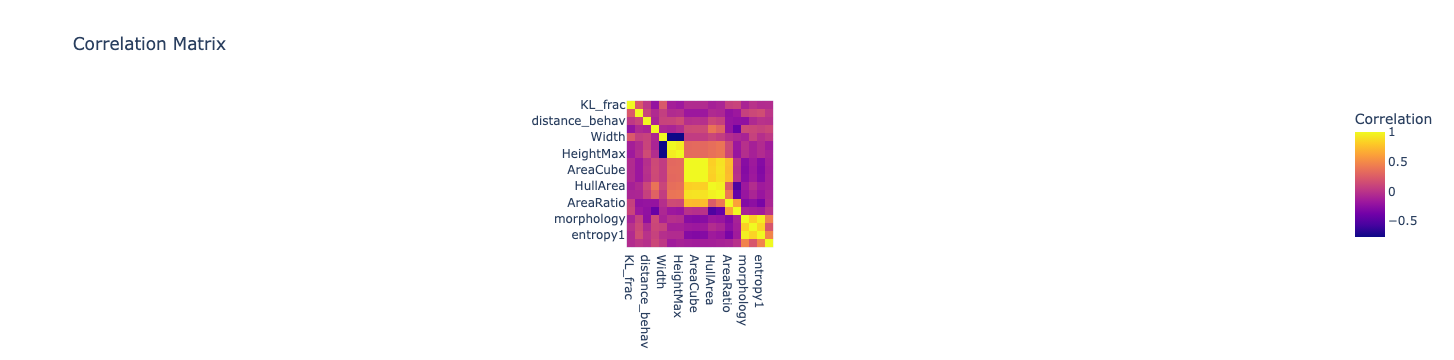

In [163]:


# Create a correlation matrix
correlation_matrix = merged_all_filtered.corr()

# Plotting using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                labels=dict(color="Correlation"),
                title="Correlation Matrix")

fig.show()

In [171]:
import plotly.graph_objects as go
import scipy.stats as stats

p_values = calculate_pvalues(merged_all_filtered)

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale='reds',
                     showscale=True))

names = correlation_matrix.columns.tolist()
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=names[j],
                y=names[i],
                text=f"p: {p_values.iloc[i, j]:.3f}",
                showarrow=False,
                font=dict(size=8, color="white" if value > 0.65 else "black")
            )
        )



# Change the size of the heatmap
fig.update_layout(
    title="Correlation Coefficient and p-values",
    annotations=annotations,
    xaxis=dict(title="Variable", tickfont=dict(size=15)),
    yaxis=dict(title="Variable", tickfont=dict(size=15)),
    autosize=False,
    width=1000,
    height=1000
)

fig.write_html("results/heatmap_correlatio_all_descriptors_entropy_behaviour.html")

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_44915/299275884.py:16: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




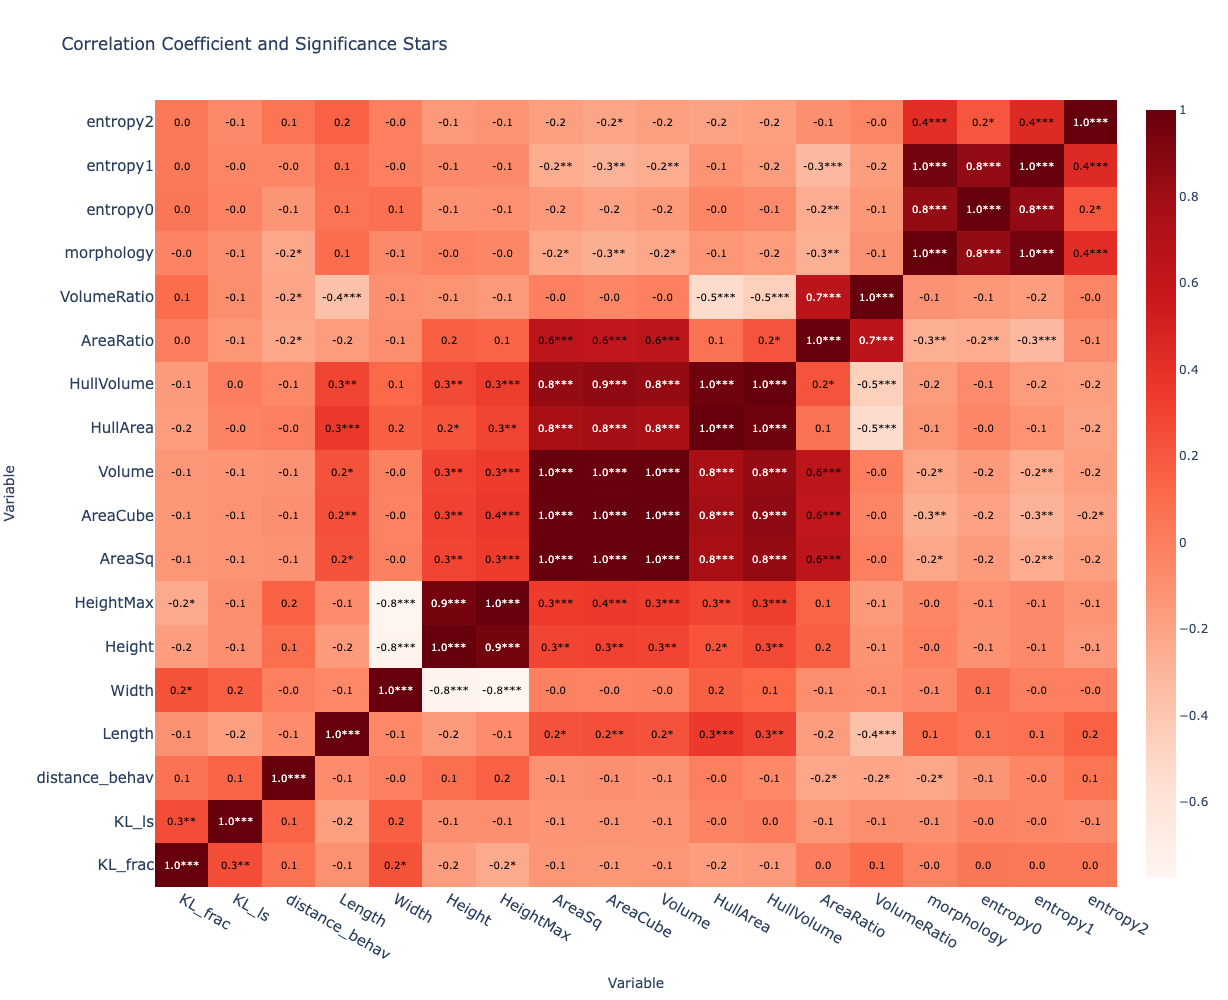

In [264]:
#Calculate correlation matrix
from scipy.stats import spearmanr
correlation_matrix, p_values = spearmanr(merged_all_filtered, nan_policy='omit')

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=columns_of_interest,
                    y=columns_of_interest,
                    colorscale='reds',
                    showscale=True))

names = columns_of_interest
annotations = []
for i, row in enumerate(correlation_matrix):
    for j, value in enumerate(row):
        # Determine significance stars
        stars = ''
        p_val = p_values[i, j]
        if p_val < 0.01:
            stars = '***'
        elif p_val < 0.05:
            stars = '**'
        elif p_val < 0.1:
            stars = '*'

        annotations.append(
            dict(
                x=names[j],
                y=names[i],
                text=f"{value:.1f}{stars}",
                showarrow=False,
                font=dict(size=10, color="white" if value > 0.65 else "black")
            )
        )

# Change the size of the heatmap
fig.update_layout(
    title="Correlation Coefficient and Significance Stars",
    annotations=annotations,
    xaxis=dict(title="Variable", tickfont=dict(size=15)),
    yaxis=dict(title="Variable", tickfont=dict(size=15)),
    autosize=False,
    width=1000,
    height=1000
)
fig.write_html("results/heatmap_correlation_all_descriptors_entropy_behaviour.html")
fig.show()

# KL vs bottleneck

In [212]:
# import bottleneck
bot = pd.read_csv("bottleneck_matrix.csv")
bot

,Unnamed: 0,796_female,195_male,354_male,306_male,705_female,853_male,228_female,850_male,136_female,...,21_male,208_female,395_male,802_male,900_male,859_male,332_female,486_male,26_male,309_male
0,796_female,1.401889e-308,1.820779e-01,3.470291e-01,1.892602e-01,2.199408e-01,0.228468,0.169603,0.210549,0.232075,...,0.154543,0.255968,0.150759,0.198227,0.150759,2.760026e-01,3.134916e-01,3.231142e-01,1.530669e-01,1.831946e-01
1,195_male,1.820779e-01,1.682332e-308,3.242245e-01,1.873473e-01,2.161442e-01,0.192031,0.166752,0.151759,0.208440,...,0.182078,0.253271,0.188738,0.186044,0.188738,2.000439e-01,3.062149e-01,2.816608e-01,1.887379e-01,1.703795e-01
2,354_male,3.470291e-01,3.242245e-01,6.739042e-309,3.049729e-01,2.490357e-01,0.233323,0.336542,0.222953,0.222953,...,0.294706,0.173189,0.350850,0.283340,0.340004,2.981194e-01,2.125812e-01,2.063612e-01,3.508501e-01,3.117860e-01
3,306_male,1.892602e-01,1.873473e-01,3.049729e-01,4.227423e-309,1.857801e-01,0.183291,0.163621,0.185780,0.185780,...,0.189260,0.246887,0.198364,0.183936,0.198364,1.925789e-01,2.425910e-01,2.567007e-01,1.983637e-01,1.882922e-01
4,705_female,2.199408e-01,2.161442e-01,2.490357e-01,1.857801e-01,1.235538e-308,0.191596,0.165911,0.135951,0.068129,...,0.219941,0.252974,0.226332,0.185255,0.226332,2.223441e-01,3.055278e-01,2.801107e-01,2.263323e-01,2.197318e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,859_male,2.760026e-01,2.000439e-01,2.981194e-01,1.925789e-01,2.223441e-01,0.203421,0.215866,0.225746,0.233484,...,0.221062,0.260898,0.288760,0.199434,0.280830,1.537431e-308,3.095878e-01,2.904498e-01,2.887599e-01,1.890450e-01
107,332_female,3.134916e-01,3.062149e-01,2.125812e-01,2.425910e-01,3.055278e-01,0.301499,0.283428,0.306215,0.305528,...,0.309963,0.246887,0.313492,0.302686,0.312898,3.095878e-01,8.901031e-309,2.520505e-01,3.134916e-01,3.095878e-01
108,486_male,3.231142e-01,2.816608e-01,2.063612e-01,2.567007e-01,2.801107e-01,0.264040,0.288568,0.279527,0.280111,...,0.295416,0.243735,0.326714,0.270574,0.326714,2.904498e-01,2.520505e-01,1.199972e-308,3.267140e-01,2.926887e-01
109,26_male,1.530669e-01,1.887379e-01,3.508501e-01,1.983637e-01,2.263323e-01,0.264993,0.182430,0.241149,0.246069,...,0.228030,0.264256,0.059874,0.209180,0.070216,2.887599e-01,3.134916e-01,3.267140e-01,3.629313e-309,1.949572e-01


In [216]:
bot.set_index(bot.columns[0], inplace=True)

In [222]:
# calculate the average distance of all the DGRP lines in bot
row_average_distances = bot.mean(axis=1)

In [224]:
bot_dist = pd.DataFrame(row_average_distances)

In [243]:
bot_dist =bot_dist.reset_index()

In [244]:
bot_dist.columns = ["DGRP","Average_bottleneck"]

In [246]:

# Split the 'DGRP' column and create the new 'DGRP' and 'Sex' columns
bot_dist[['DGRP', 'Sex']] = bot_dist['DGRP'].str.split('_', expand=True)

# Update the 'DGRP' column
bot_dist['DGRP'] = 'DGRP_' + bot_dist['DGRP']

# Update the 'Sex' column
bot_dist['Sex'] = bot_dist['Sex'].apply(lambda x: 'M' if x == 'male' else 'F')

bot_dist['DGRP'] = bot_dist['DGRP'].apply(lambda x: 'DGRP_0' + x.split('DGRP_')[1] if len(x.split('DGRP_')[1]) == 2 else 'DGRP_' + x.split('DGRP_')[1])

In [249]:
# merge bot_dist and kl

merged_bot_kl = kl.merge(bot_dist, on=['DGRP', 'Sex'])

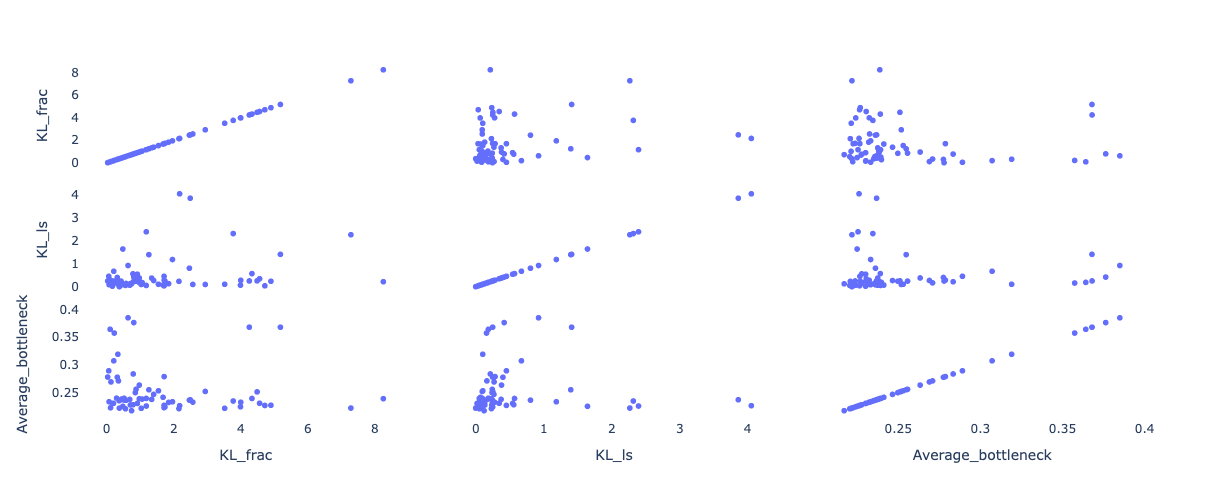

In [259]:
kl_bot_modified = merged_bot_kl.drop(['DGRP',"Sex"], axis=1)

# Create the scatter matrix plot with trendlines
fig = px.scatter_matrix(kl_bot_modified, width=500, height=500)

# Delete the background
fig.update_layout(
    autosize=False,
    plot_bgcolor='rgba(0,0,0,0)',
    #paper_bgcolor='rgba(0,0,0,0)',
)
fig.show()
fig.write_html("results/kl_bottleneck_scatter.html")

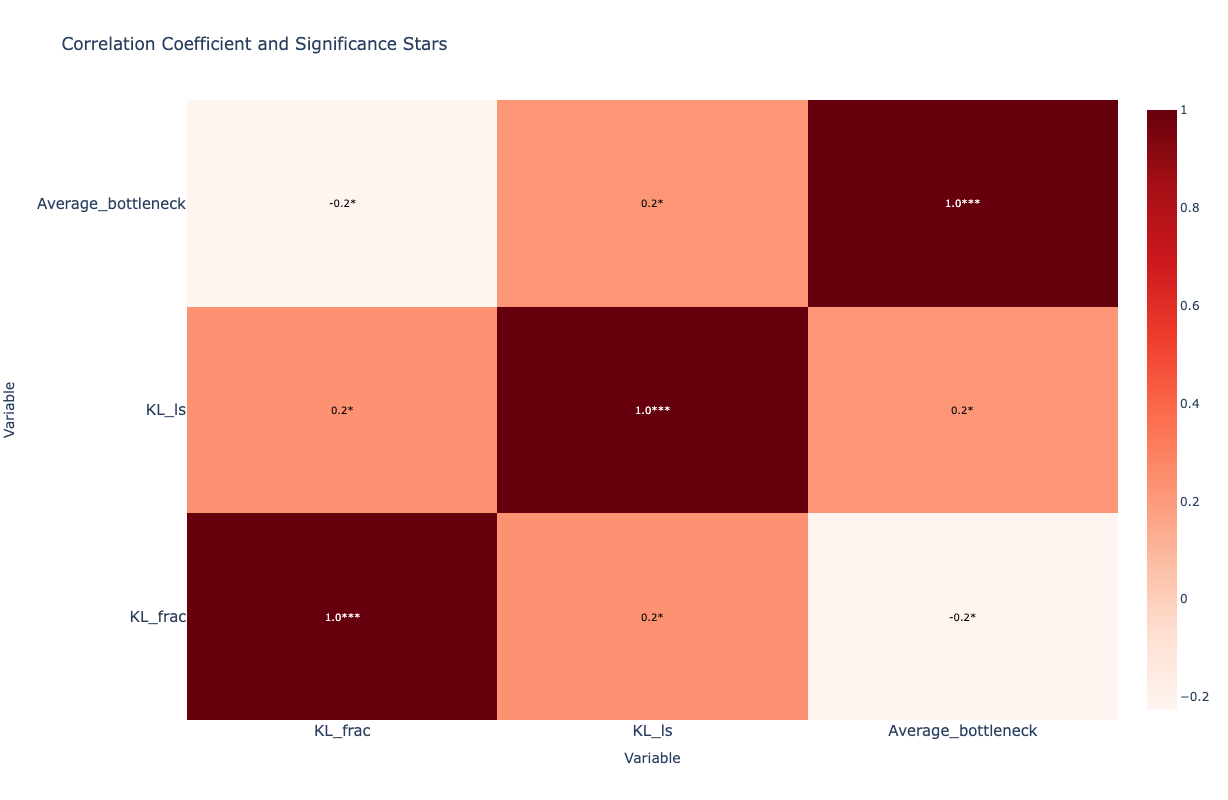

In [261]:
#Calculate correlation matrix
from scipy.stats import spearmanr
columns_of_interest = kl_bot_modified.columns.tolist()
correlation_matrix, p_values = spearmanr(kl_bot_modified, nan_policy='omit')

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=columns_of_interest,
                    y=columns_of_interest,
                    colorscale='reds',
                    showscale=True))

names = columns_of_interest
annotations = []
for i, row in enumerate(correlation_matrix):
    for j, value in enumerate(row):
        # Determine significance stars
        stars = ''
        p_val = p_values[i, j]
        if p_val < 0.01:
            stars = '***'
        elif p_val < 0.05:
            stars = '**'
        elif p_val < 0.1:
            stars = '*'

        annotations.append(
            dict(
                x=names[j],
                y=names[i],
                text=f"{value:.1f}{stars}",
                showarrow=False,
                font=dict(size=10, color="white" if value > 0.65 else "black")
            )
        )

# Change the size of the heatmap
fig.update_layout(
    title="Correlation Coefficient and Significance Stars",
    annotations=annotations,
    xaxis=dict(title="Variable", tickfont=dict(size=15)),
    yaxis=dict(title="Variable", tickfont=dict(size=15)),
    autosize=False,
    width=800,
    height=800
)
fig.write_html("results/kl_bottleneck_heatmap.html")
fig.show()